In [1]:
import selenium
import pandas as pd
import time
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException,ElementNotInteractableException
import requests

In [3]:
driver = webdriver.Chrome(r'C:\Users\USER\Downloads\chromedriver_win32 (3)\chromedriver.exe')
url = 'https://www.uefa.com/uefachampionsleague/clubs/'
driver.get(url)

In [28]:
team = []
goals_per_match = []
posession = []
balls_recovered = []
clean_sheet = []
distance_covered = []
red_card = []
goals_conceded = []
passing_accuracy = []
tackle_won =[]
saves = []
yellow_card = []


In [5]:
url = []
team_elements = driver.find_elements_by_xpath("//a[@class='team-wrap']")
for i in range(2):
    url.append(team_elements[i].get_attribute("href"))

In [6]:
url

['https://www.uefa.com/uefachampionsleague/clubs/50138--inter/',
 'https://www.uefa.com/uefachampionsleague/clubs/52919--man-city/']

In [29]:
for i in url:
    driver.get(i)
    time.sleep(3)
    
    
    try:
        j = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[1]/div[1]/div/div/div/pk-identifier/h2/span[1]')
        team.append(j.text)
    except NoSuchElementException:
        team.append('-')
    
    
    try:
        j = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[3]/pk-num-stat-item/div[1]')
        goals_conceded.append(j.text)
    except NoSuchElementException:
        goals_conceded.append('-')
        
    try:
        k = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[5]/pk-num-stat-item/div[1]')
        passing_accuracy.append(k.text)
    except NoSuchElementException:
        passing_accuracy.append('-')
        
    try:
        l = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[7]/pk-num-stat-item/div[1]')
        tackle_won.append(l.text)
    except NoSuchElementException:
        tackle_won.append('-')
        
    try:
        m = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[9]/pk-num-stat-item/div[1]')
        saves.append(m.text)
    except NoSuchElementException:
        saves.append('-')
        
    try:
        o = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[2]/pk-num-stat-item/div[1]')                       
        goals_per_match.append(o.text)
    except NoSuchElementException:
        goals_per_match.append('-')
        
    try:
        q =driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[4]/pk-num-stat-item/div[1]')
        posession.append(q.text)
    except NoSuchElementException:
        posession.append('-')
        
    try:
        q =driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[6]/pk-num-stat-item/div[1]')
        balls_recovered.append(q.text)
    except NoSuchElementException:
        balls_recovered.append('-')
        
        
    try:
        q =driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[8]/pk-num-stat-item/div[1]')
        clean_sheet.append(q.text)
    except NoSuchElementException:
        clean_sheet.append('-')
           
        
    try:
        q =driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[10]/pk-num-stat-item/div[1]')
        distance_covered.append(q.text)
    except NoSuchElementException:
        distance_covered.append('-')
        
       
    try:
        q =driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[12]/pk-num-stat-item/div[1]')
        red_card.append(q.text)
    except NoSuchElementException:
        red_card.append('-')
        
    try:
        q =driver.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div[1]/pk-box[1]/div/div[2]/div[11]/pk-num-stat-item/div[1]')
        yellow_card.append(q.text)
    except NoSuchElementException:
        yellow_card.append('-')       

In [31]:
df = pd.DataFrame({})
df["Team"] =  team
df["Goals Avg"] =goals_per_match
df["Possession (%)"] = posession
df["Balls recovered Avg"] = balls_recovered
df["Distance covered (km)"] = clean_sheet
df["Red cards"] = red_card
df["Goals conceded"] = goals_conceded
df["Passing accuracy (%)"] = passing_accuracy
df["Tackles won"] = tackle_won
df["Saves"] = saves
df["Yellow cards"] = yellow_card
df

,Team,Goals Avg,Possession (%),Balls recovered Avg,Distance covered (km),Red cards,Goals conceded,Passing accuracy (%),Tackles won,Saves,Yellow cards
0,FC INTERNAZIONALE MILANO,19,46.42%,461,8,1,10,82.92%,83,45,24
1,MANCHESTER CITY FC,31,59.84%,449,7,1,5,90.42%,41,26,20


In [32]:
print("size of the data :",df.shape)
print("Name of the coulmns:",df.columns)

size of the data : (2, 11)
Name of the coulmns: Index(['Team', 'Goals Avg', 'Possession (%)', 'Balls recovered Avg',
       'Distance covered (km)', 'Red cards', 'Goals conceded',
       'Passing accuracy (%)', 'Tackles won', 'Saves', 'Yellow cards'],
      dtype='object')


In [35]:
df.isnull().sum().sum()

0

In [36]:
df.dtypes

Team                     object
Goals Avg                object
Possession (%)           object
Balls recovered Avg      object
Distance covered (km)    object
Red cards                object
Goals conceded           object
Passing accuracy (%)     object
Tackles won              object
Saves                    object
Yellow cards             object
dtype: object

In [37]:
df["Goals Avg"] = df["Goals Avg"].astype(int)

In [39]:
df["Possession (%)"] = df["Possession (%)"].str.strip("%").astype(float)

In [41]:
df["Balls recovered Avg"] =df["Balls recovered Avg"].astype(int)

In [42]:
df["Distance covered (km)"] =df["Distance covered (km)"].astype(int)

In [43]:
df["Red cards"] =df["Red cards"].astype(int)

In [44]:
df["Goals conceded"] =df["Goals conceded"].astype(int)

In [47]:
df["Passing accuracy (%)"] =df["Passing accuracy (%)"].str.strip("%").astype(float)

In [48]:
df["Tackles won"] =df["Tackles won"].astype(int)

In [49]:
df["Saves"] =df["Saves"].astype(int)

In [50]:
df["Yellow cards"] =df["Yellow cards"].astype(int)

In [51]:
df.dtypes

Team                      object
Goals Avg                  int32
Possession (%)           float64
Balls recovered Avg        int32
Distance covered (km)      int32
Red cards                  int32
Goals conceded             int32
Passing accuracy (%)     float64
Tackles won                int32
Saves                      int32
Yellow cards               int32
dtype: object

In [52]:
df.describe()

,Goals Avg,Possession (%),Balls recovered Avg,Distance covered (km),Red cards,Goals conceded,Passing accuracy (%),Tackles won,Saves,Yellow cards
count,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
mean,25.000000,53.130000,455.000000,7.500000,1.0,7.500000,86.670000,62.000000,35.500000,22.000000
std,8.485281,9.489373,8.485281,0.707107,0.0,3.535534,5.303301,29.698485,13.435029,2.828427
min,19.000000,46.420000,449.000000,7.000000,1.0,5.000000,82.920000,41.000000,26.000000,20.000000
25%,22.000000,49.775000,452.000000,7.250000,1.0,6.250000,84.795000,51.500000,30.750000,21.000000
50%,25.000000,53.130000,455.000000,7.500000,1.0,7.500000,86.670000,62.000000,35.500000,22.000000
75%,28.000000,56.485000,458.000000,7.750000,1.0,8.750000,88.545000,72.500000,40.250000,23.000000
max,31.000000,59.840000,461.000000,8.000000,1.0,10.000000,90.420000,83.000000,45.000000,24.000000


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

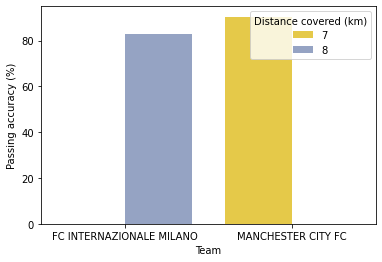

In [58]:
sns.barplot(x=df["Team"], y=df["Passing accuracy (%)"], hue = df["Distance covered (km)"],palette = 'Set2_r')
plt.xlabel('Team')
plt.ylabel('Passing accuracy (%)')
plt.show()

Highest passing accuracy is done by Manchester city with less distance covered (per match)

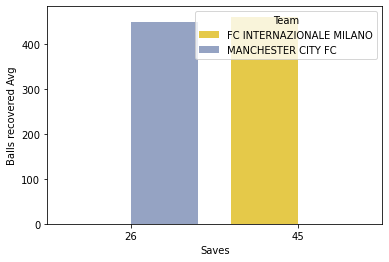

In [64]:
sns.barplot(x=df["Saves"], y=df["Balls recovered Avg"], hue = df["Team"],palette = 'Set2_r')
plt.xlabel('Saves')
plt.ylabel('Balls recovered Avg')
plt.show()

Both Team are equal proportion

<AxesSubplot:xlabel='Yellow cards', ylabel='count'>

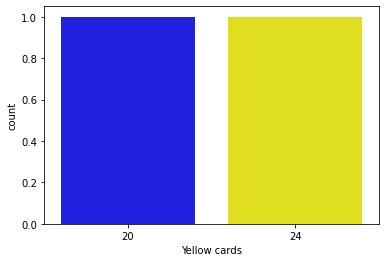

In [69]:
sns.countplot(x = "Yellow cards", data = df,color = 'm',palette = ["blue","yellow"])

INTERNAZIONALE MILANO got 4 more than yellow cards than oposite team

<AxesSubplot:xlabel='Possession (%)', ylabel='Tackles won'>

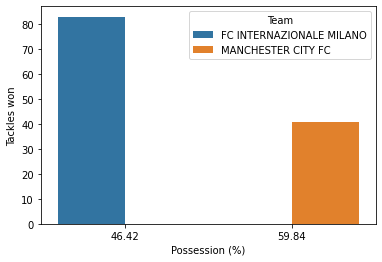

In [73]:
sns.barplot(y = "Tackles won", x="Possession (%)", hue="Team", data = df)

As per the data we can conclude that Manchester is the best for the final and they got more possession Avg per match and nearset 100% passing accuracy